***LIBRARIES***

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,f1_score,roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
# from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')






***EDA&PREPROCESSING***

In [86]:
data=pd.read_csv('loan_approval_dataset.csv')
df=data.copy()
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [87]:
df.columns=df.columns.str.strip()

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [89]:
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [90]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [91]:
df.describe(include='object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [92]:
df.drop('loan_id',axis=1,inplace=True)

In [93]:
df['loan_status']=df['loan_status'].map({' Approved':1,' Rejected':0})

In [94]:
df['loan_status'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4269 entries, 0 to 4268
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
4269 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB


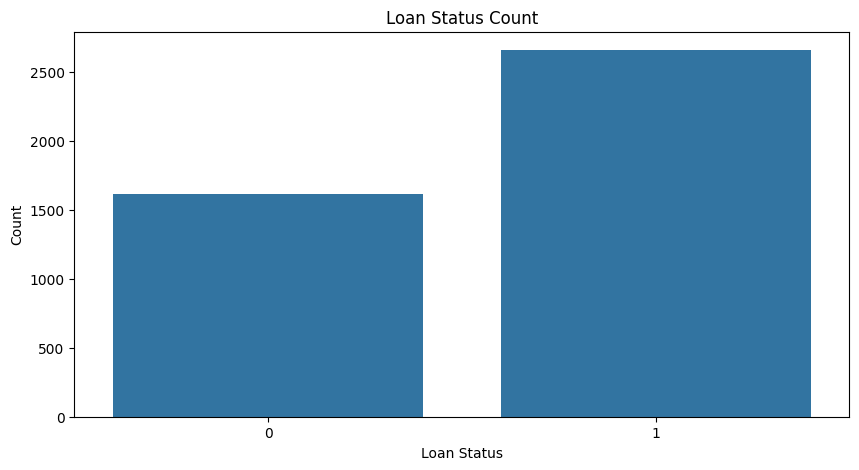

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x='loan_status',data=df)
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [96]:
cat=df.select_dtypes(include='object').columns
num=df.select_dtypes(exclude='object').columns

In [97]:
# num = num.drop(['loan_status'])

In [98]:
def plot_distribution(column_name, df, colors=('#4B8BBE', '#FFB000', '#94C973')):
   
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    data = df[column_name].dropna()

    if not pd.api.types.is_numeric_dtype(data):
        raise TypeError(f"Column '{column_name}' is not numeric.")

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Distribution of "{column_name}"', fontsize=20, fontweight='bold', color='navy')

    # Histogram
    sns.histplot(data, bins=30, color=colors[0], ax=axes[0], edgecolor='black')
    axes[0].set_title('Histogram', fontsize=14, color='darkblue')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Frequency')

    # KDE Plot
    sns.kdeplot(data, fill=True, color=colors[1], ax=axes[1])
    axes[1].set_title('Density Plot (KDE)', fontsize=14, color='darkorange')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Density')

    # Box Plot
    sns.boxplot(y=data, ax=axes[2], color=colors[2])
    axes[2].set_title('Box Plot', fontsize=14, color='darkgreen')
    axes[2].set_ylabel(column_name)

    # Grid
    for ax in axes:
        ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

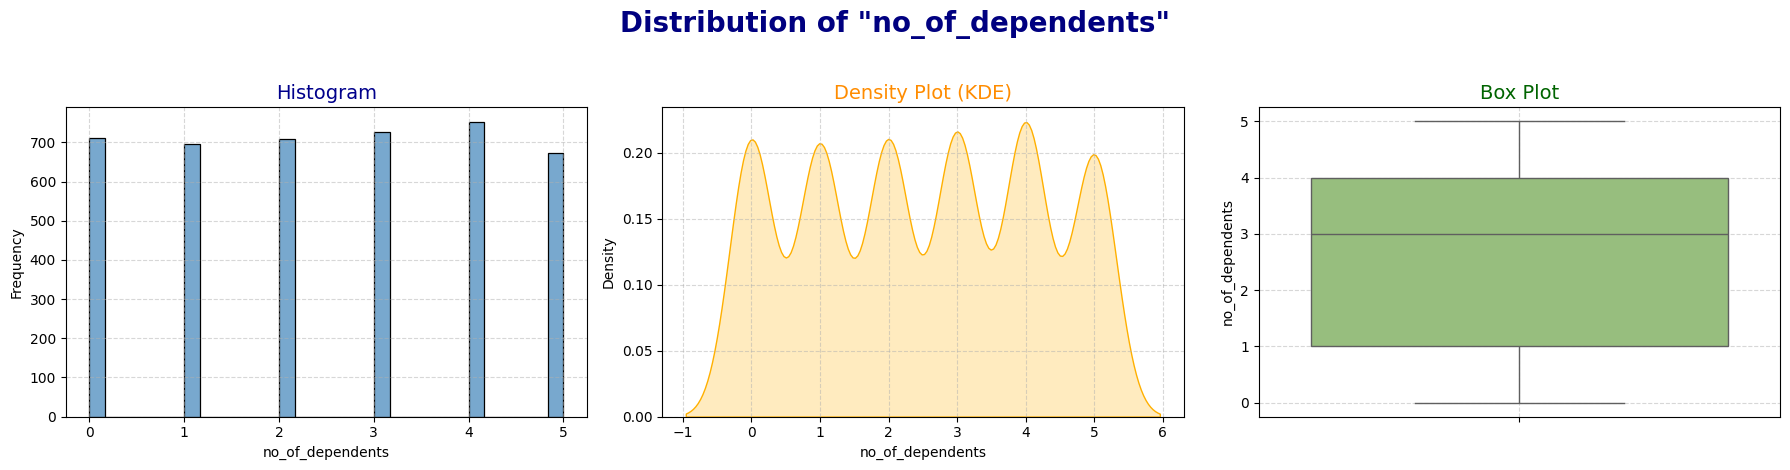

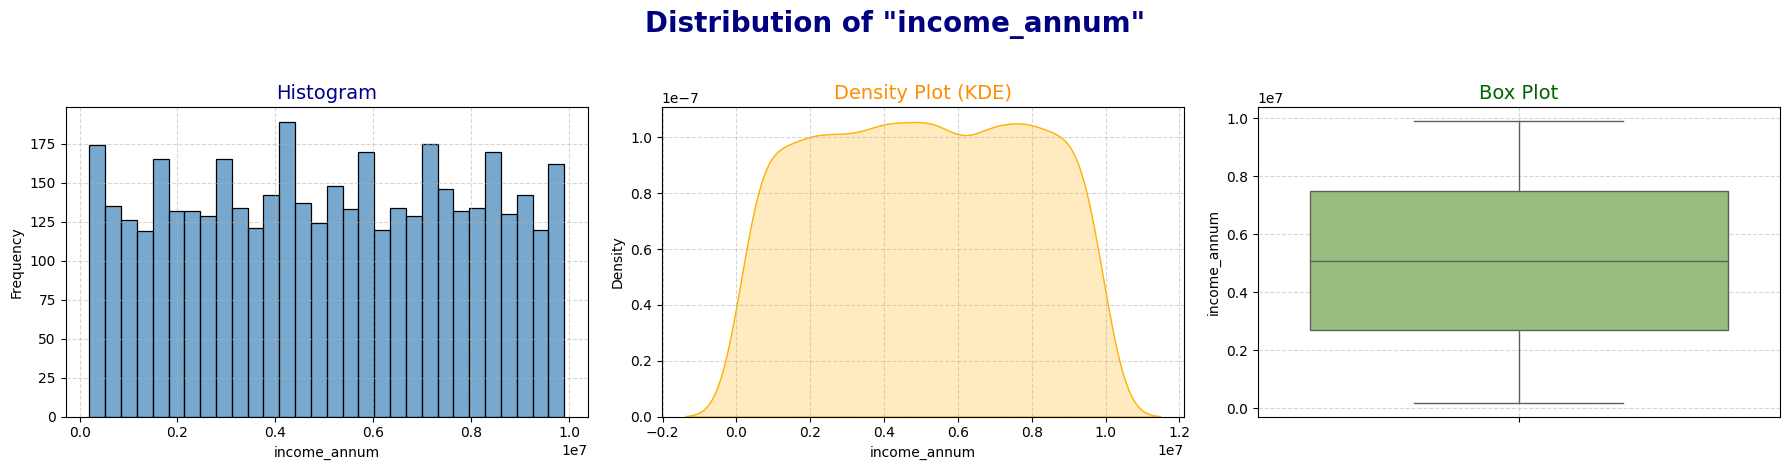

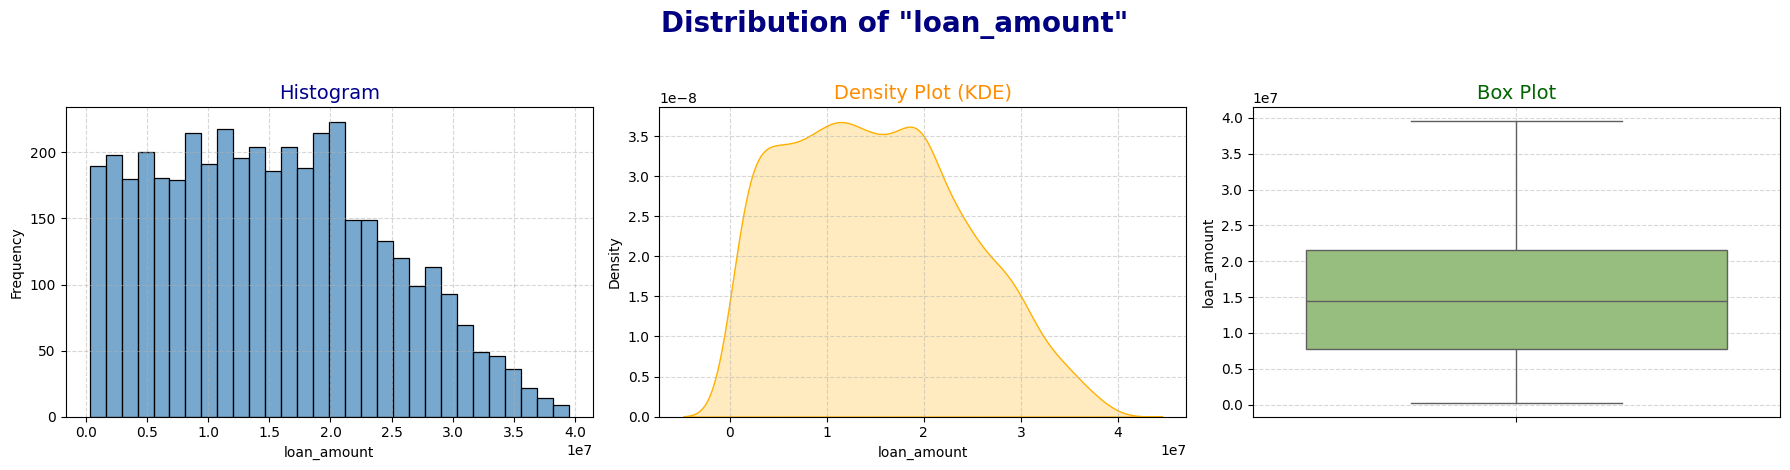

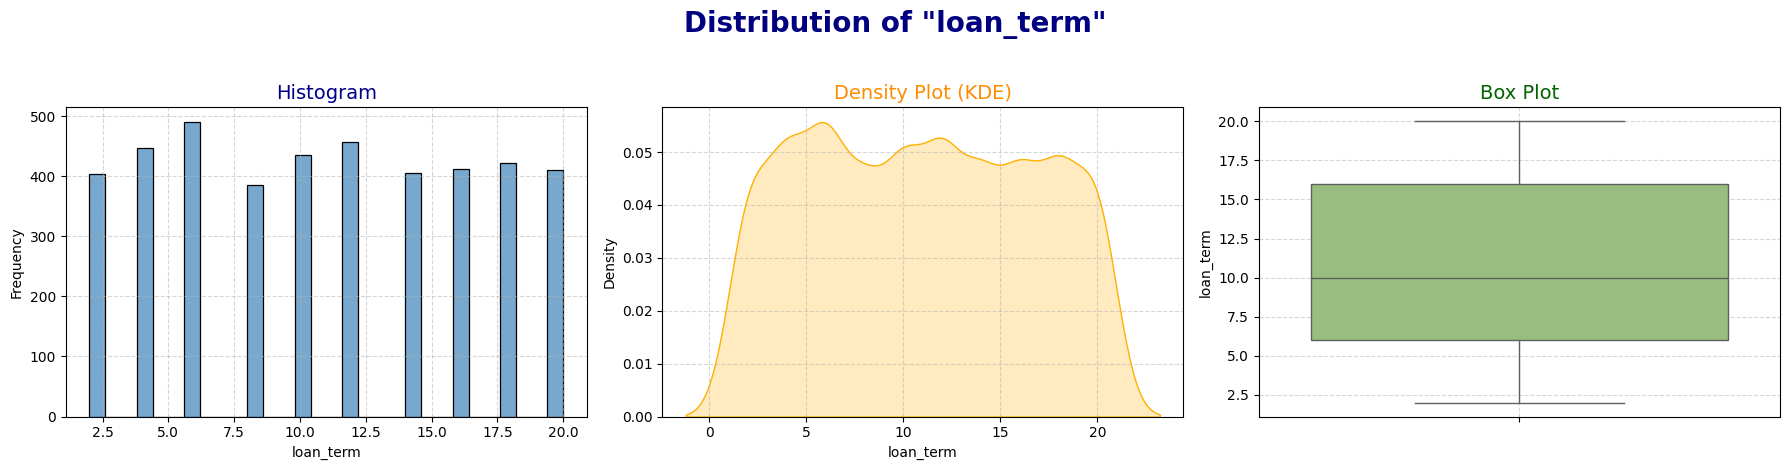

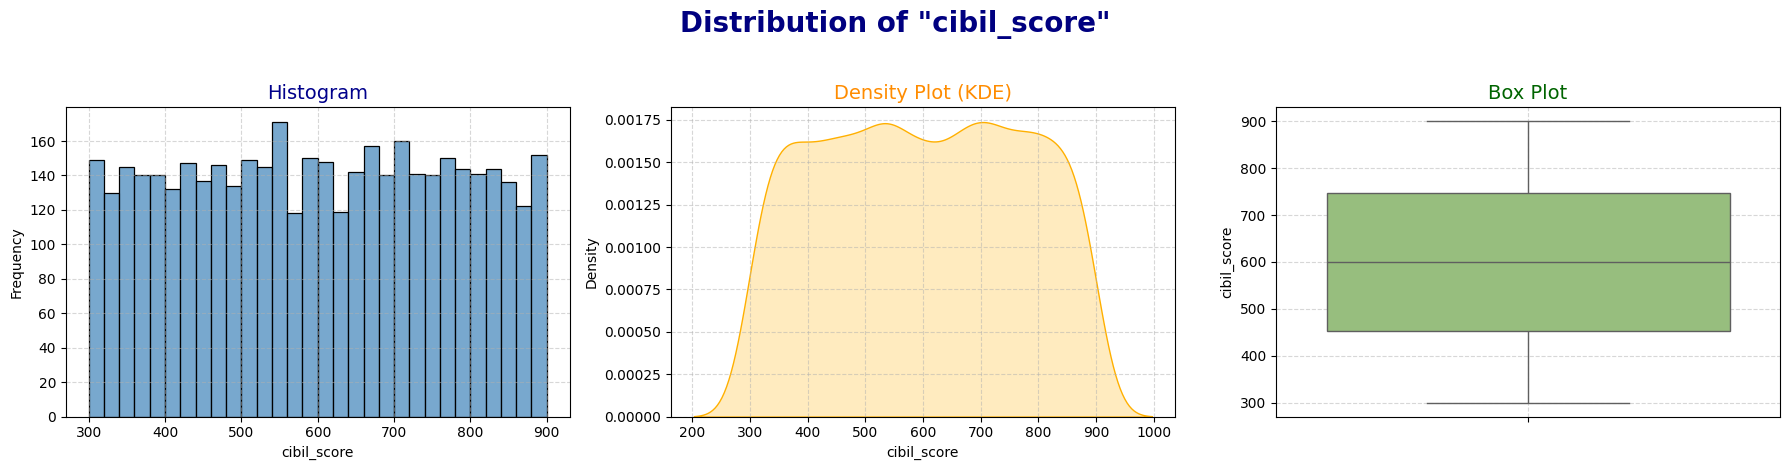

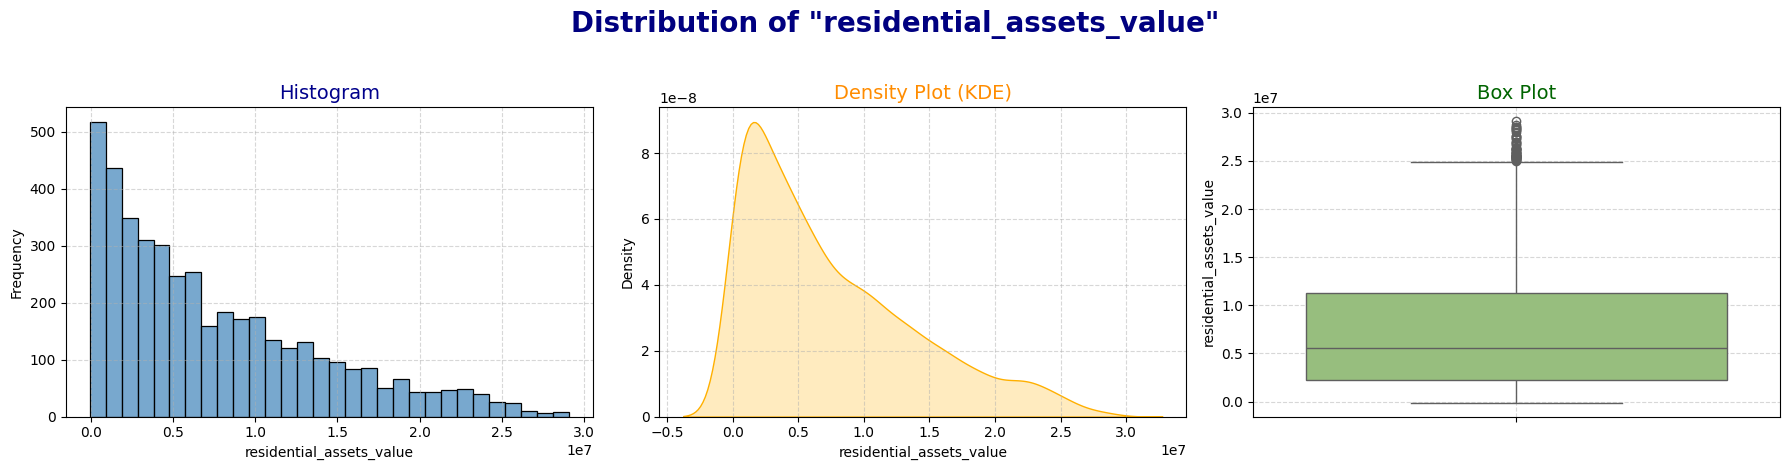

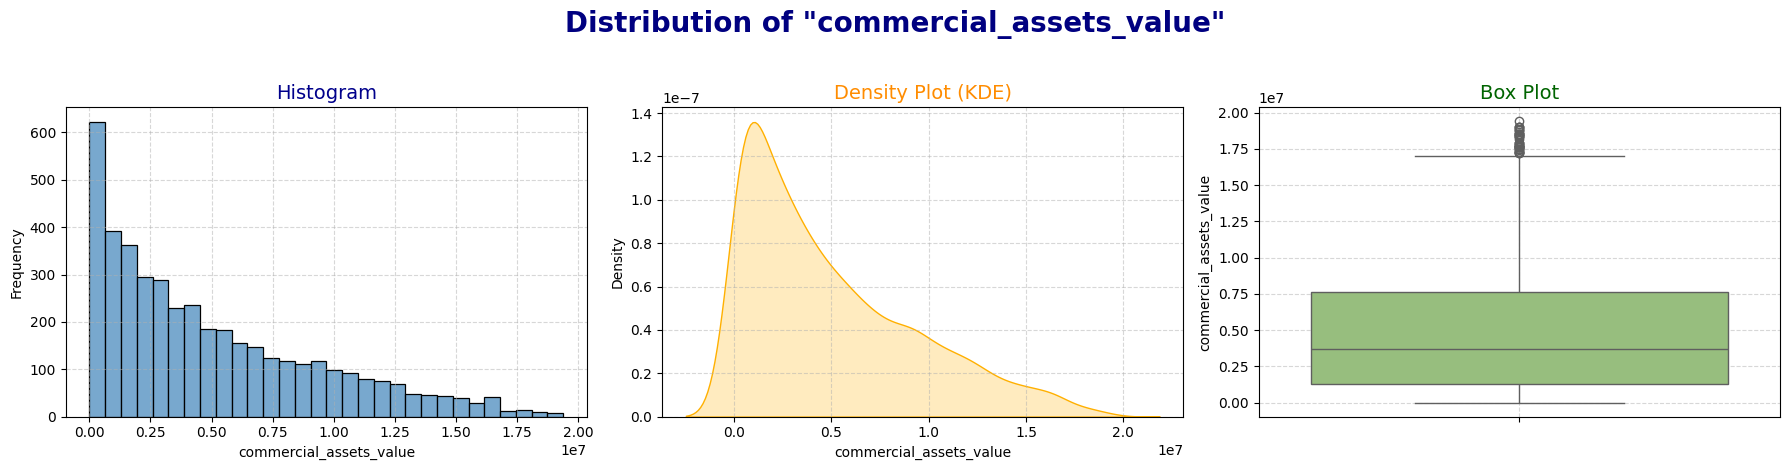

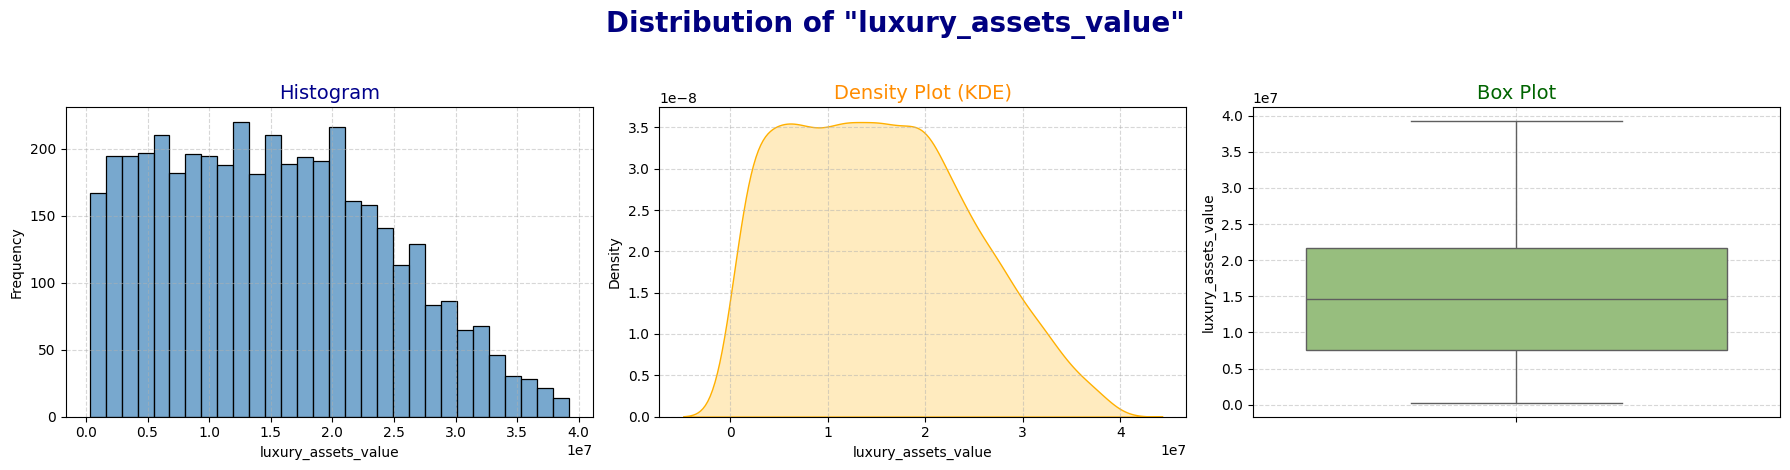

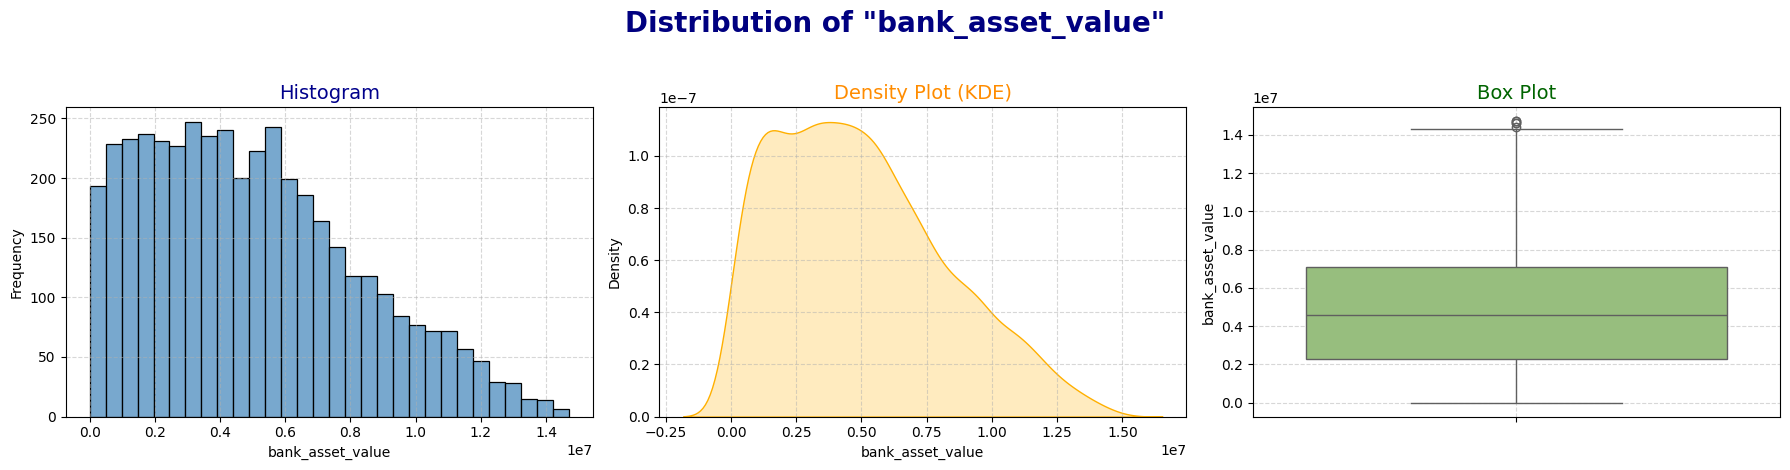

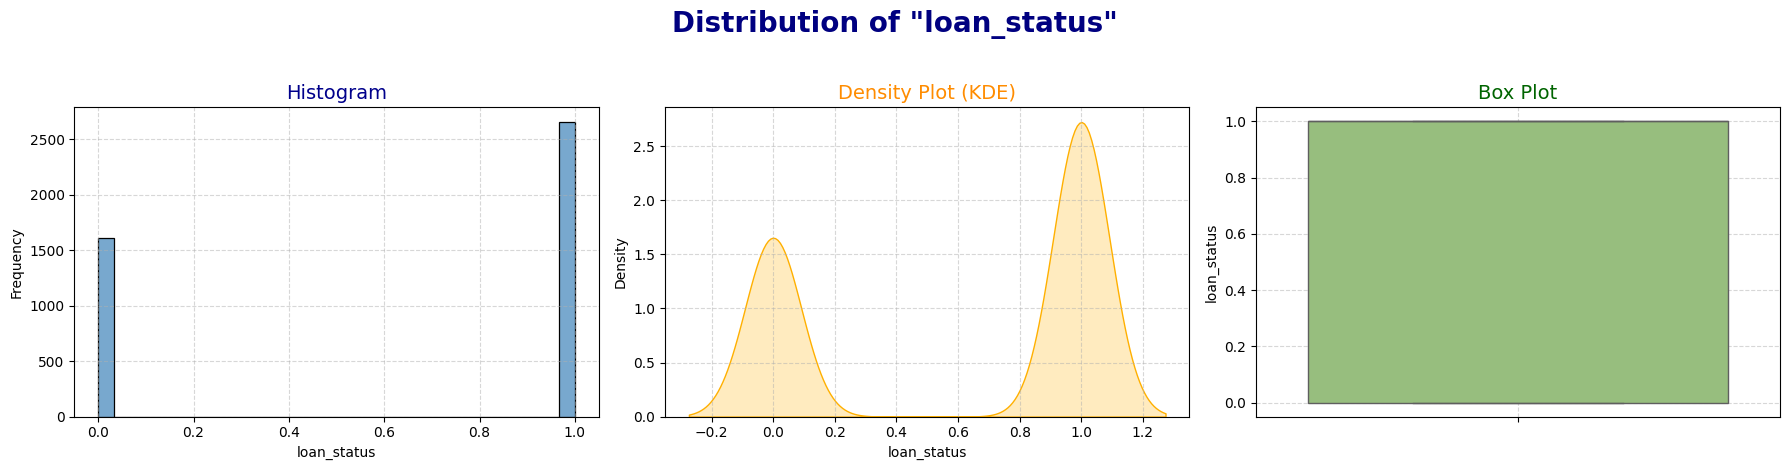

In [99]:
for column in num:
    plot_distribution(column, df)

In [100]:
def plot_categorical_distribution(column_name, df):
   

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    data = df[column_name].dropna()
    counts = data.value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    fig.suptitle(f'Distribution of "{column_name}"', fontsize=18, fontweight='bold')

    palette = sns.color_palette('Set2', len(counts))

    # Count Plot
    sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)
    axes[0].set_title('Count Plot', fontsize=14)
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Count')
    if counts.size > 5:
        axes[0].tick_params(axis='x', rotation=45)

    # Pie Chart
    axes[1].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=palette
    )
    axes[1].set_title('Pie Chart', fontsize=14)
    axes[1].axis('equal')

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()


In [101]:
cat

Index(['education', 'self_employed'], dtype='object')

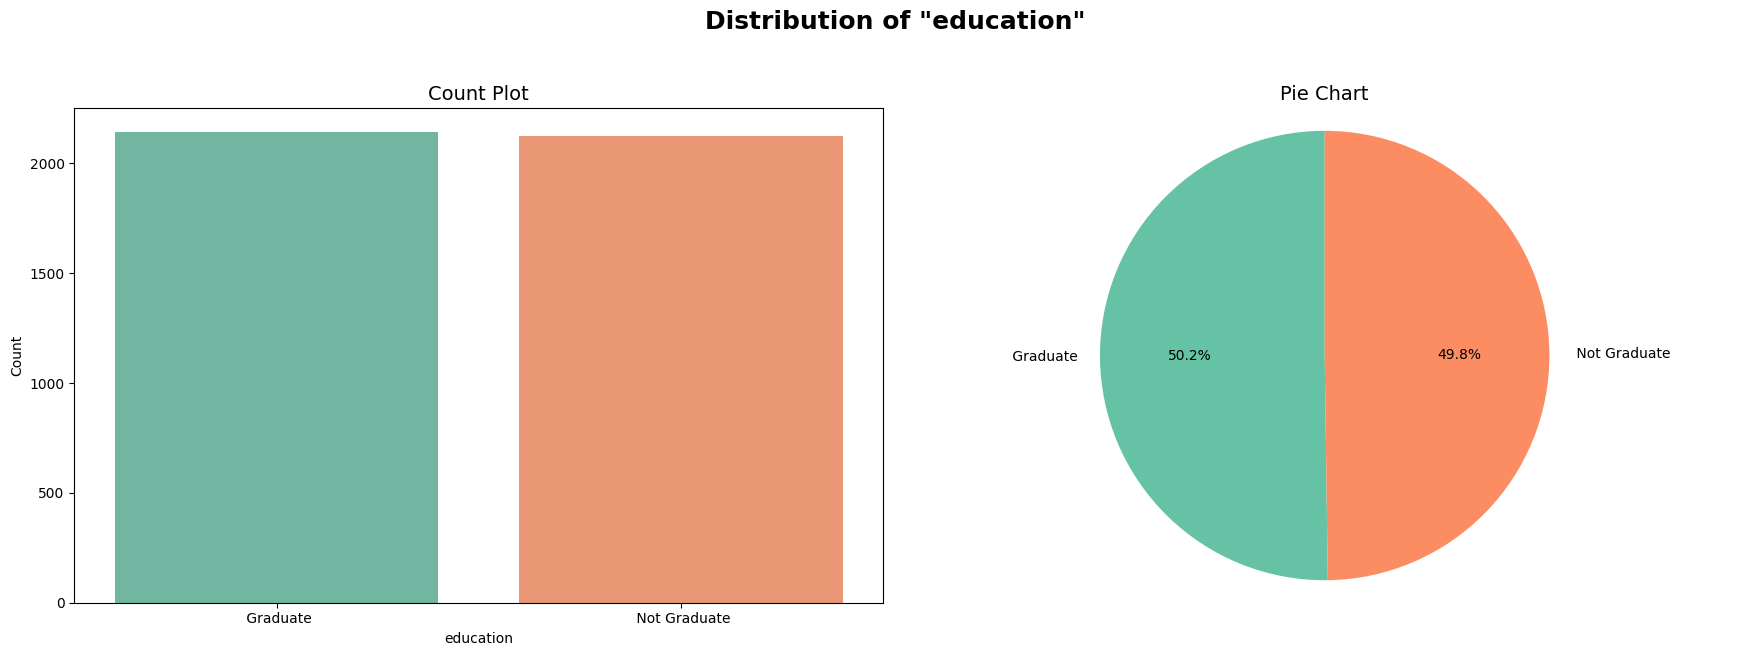

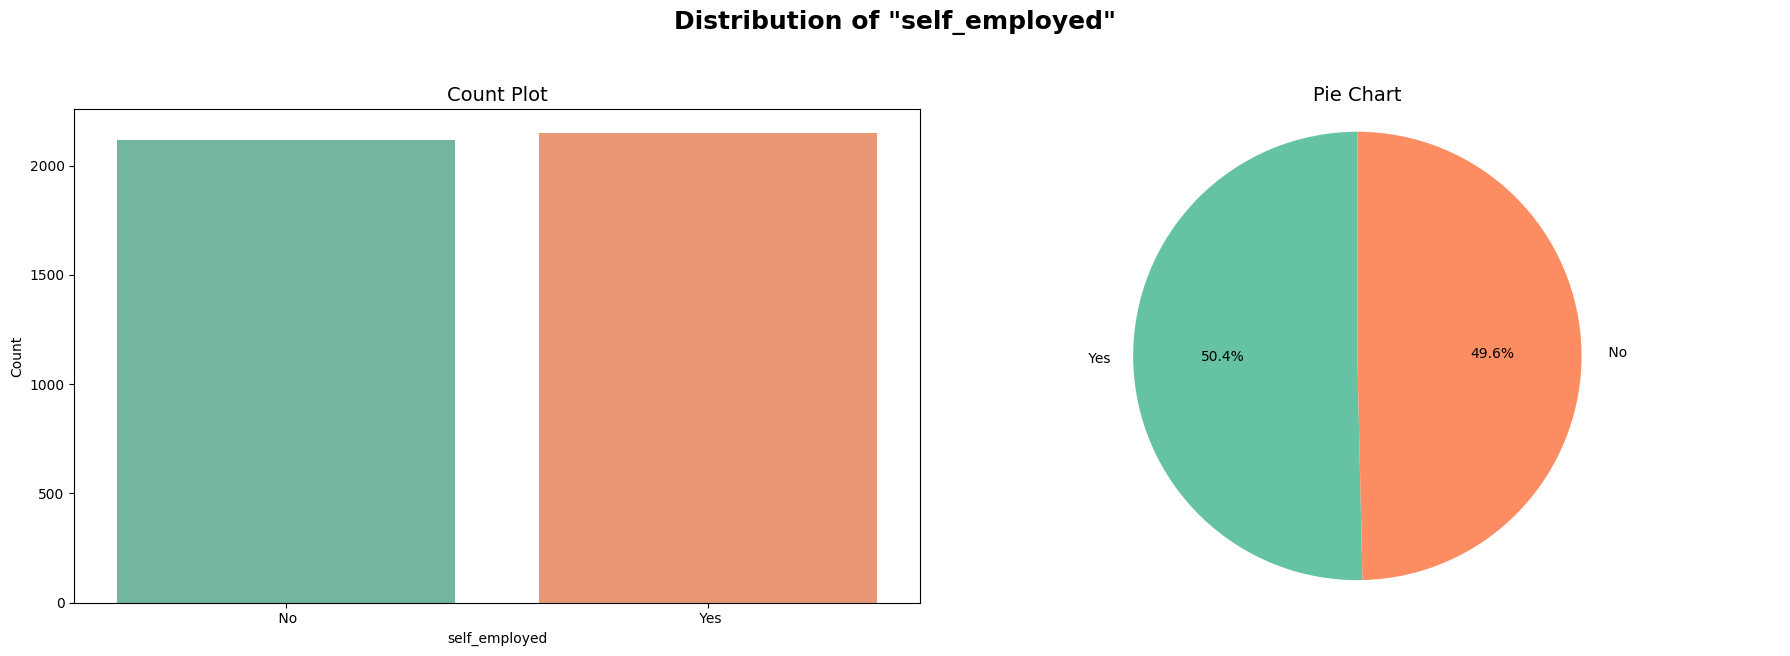

In [102]:
for col in cat:
    plot_categorical_distribution(col, df)

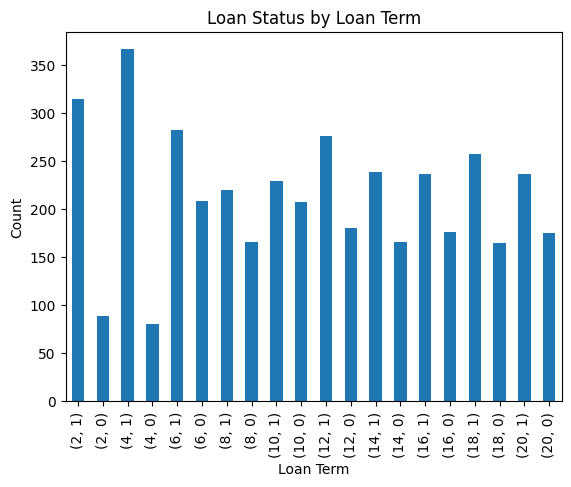

In [103]:
df.groupby('loan_term')['loan_status'].value_counts().plot(kind='bar', stacked=True)
plt.title('Loan Status by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

In [104]:
df[num].skew()

no_of_dependents           -0.017971
income_annum               -0.012814
loan_amount                 0.308724
loan_term                   0.036359
cibil_score                -0.009039
residential_assets_value    0.978451
commercial_assets_value     0.957791
luxury_assets_value         0.322208
bank_asset_value            0.560725
loan_status                -0.504087
dtype: float64

In [ ]:

def remove_outliers_iqr(df, columns=None, factor=1.5):
    
    df_clean = df.copy()
    if columns is None:
        columns = df_clean.select_dtypes(include='number').columns

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR

        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

    return df_clean


In [106]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UP_FENNCE = Q3 + 1.5 * IQR
    LO_FENNCE = Q1 - 1.5 * IQR

    lowOutlier = df[df[col] < LO_FENNCE][col].values
    upOutlier = df[df[col] > UP_FENNCE][col].values

    df[col] = df[col].replace(lowOutlier, LO_FENNCE)
    df[col] = df[col].replace(upOutlier, UP_FENNCE)

In [107]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [108]:
for col in ['bank_asset_value','residential_assets_value','commercial_assets_value']:
    remove_outliers_iqr(df, col)

<Axes: >

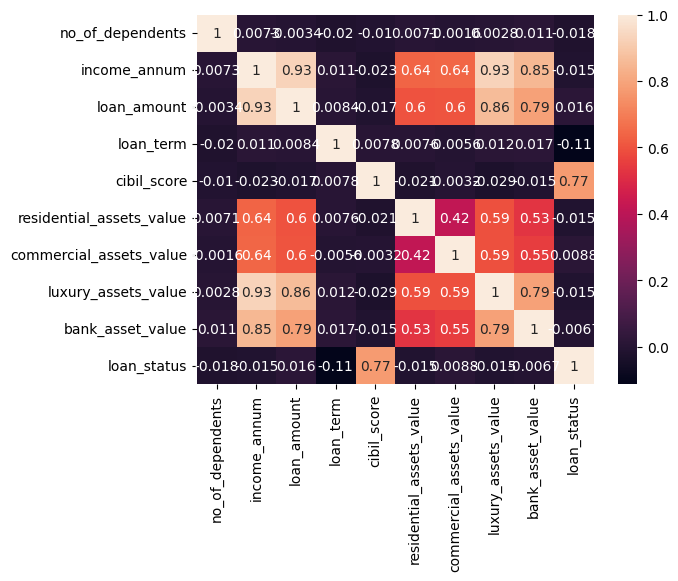

In [109]:
sns.heatmap(df[num].corr(),annot=True)

In [110]:
# for col in num:
#     if df[col].skew() > .55:
#         df[col] = df[col].apply(lambda x: np.log(x))

In [111]:
encoder=LabelEncoder()
for col in cat:
    df[col]=encoder.fit_transform(df[col])

In [112]:
# scaller=StandardScaler()
# df=pd.DataFrame(scaller.fit_transform(df),columns=df.columns)

In [113]:
df.isna().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [114]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [115]:
scaller=StandardScaler()
X=pd.DataFrame(scaller.fit_transform(X),columns=X.columns)

In [116]:
X.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [117]:
# X.drop(['loan_term','no_of_dependents','education'],axis=1,inplace=True)

In [119]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resample, y_resample = smote.fit_resample(X, y)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)


In [ ]:
# X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

***MODELING***

In [ ]:
lgr=LogisticRegression()
lgr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [121]:
y_pred=lgr.predict(X_test)

In [122]:
lgr.score(X_train,y_train)

0.9204518710284773

In [123]:
print(f"modelsccore={lgr.score(X_test,y_test)}")
print(f"f1_score={f1_score(y_test,y_pred)}")
print(f"accuracy_score={accuracy_score(y_test,y_pred)}")

modelsccore=0.922859830667921
f1_score=0.9205426356589147
accuracy_score=0.922859830667921


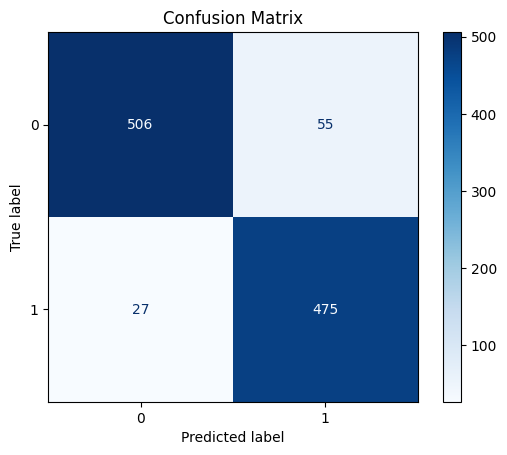

In [124]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

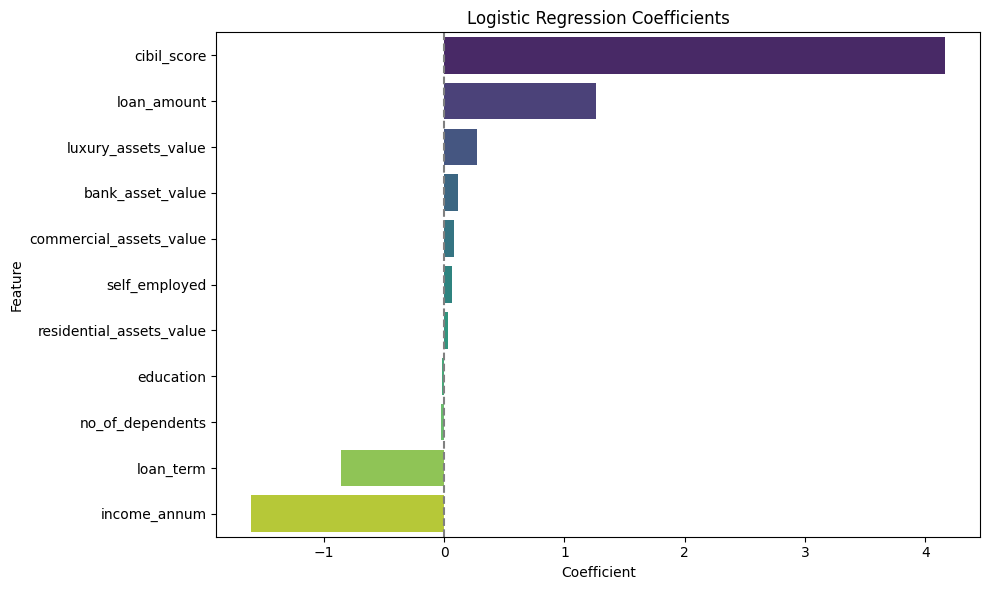

In [125]:
feature_names = X_train.columns

coefficients = lgr.coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Logistic Regression Coefficients')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

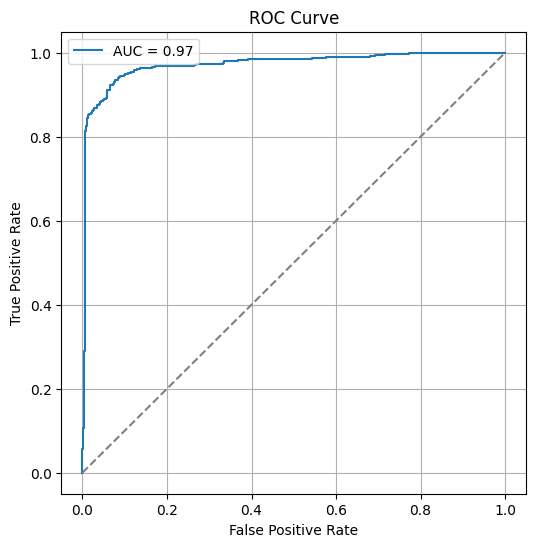

In [126]:


y_proba = lgr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

<Axes: ylabel='Count'>

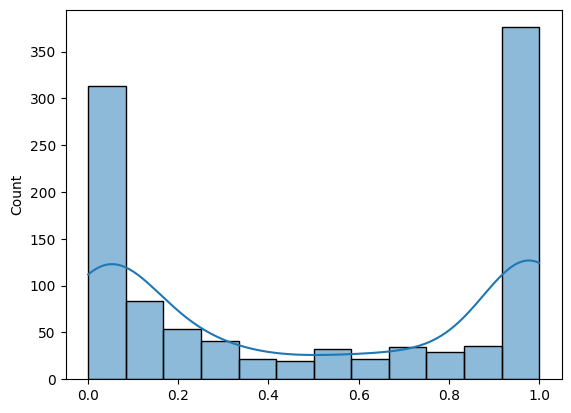

In [127]:
probs = lgr.predict_proba(X_test)[:,1]
sns.histplot(probs, kde=True)

In [128]:
dr=DecisionTreeClassifier()
dr.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [129]:
y_preddr=dr.predict(X_test)

In [130]:
print(f"modelsccore={dr.score(X_test,y_test)}")
print(f"f1_score={f1_score(y_test,y_preddr)}")
print(f"accuracy_score={accuracy_score(y_test,y_preddr)}")

modelsccore=0.9793038570084666
f1_score=0.9782608695652174
accuracy_score=0.9793038570084666


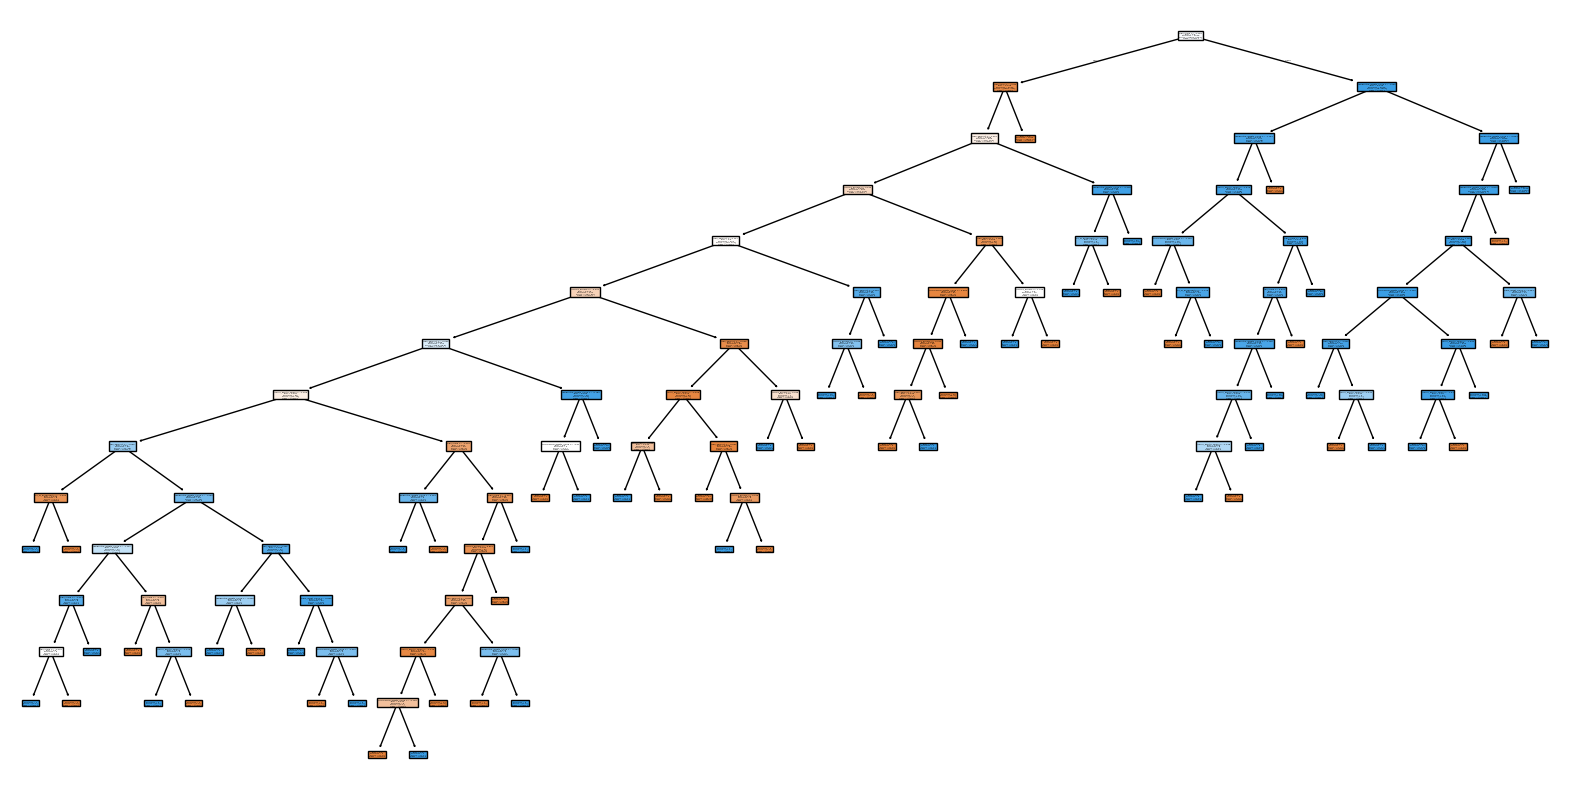

In [131]:
plt.figure(figsize=(20, 10))
plot_tree(dr, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()

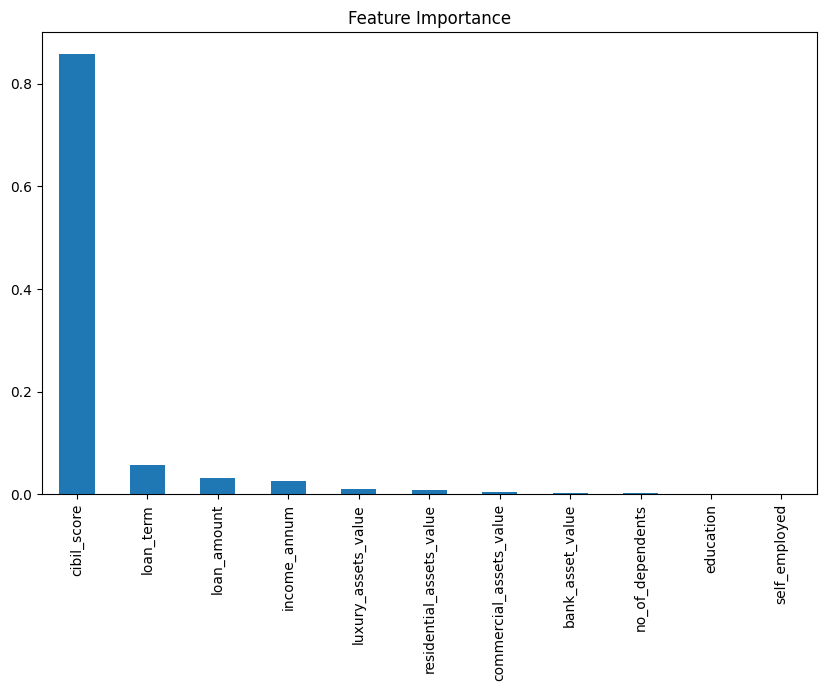

In [132]:
importances = dr.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar')
plt.title('Feature Importance')
plt.show()